<a href="https://colab.research.google.com/github/raphaeldiscky/ml-projects/blob/main/classification%20-%20multiclasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
  
uploaded = files.upload()

df = pd.read_csv('Iris.csv')
df.info()

Saving Iris.csv to Iris.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# drop column id
df = df.drop(columns='Id')

In [9]:
# do one hot encoding because our label is a categorical data
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [10]:
# concatenate one hot encoding result column and discard the species column
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [11]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [12]:
X = dataset[:,0:4] # atributtes, first 4 columns
y = dataset[:,4:7] # label, last 3 columns

In [13]:
# normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [14]:
# training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [15]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# assign to history
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 15s 7ms/step - loss: 1.0791 - accuracy: 0.3438
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0498 - accuracy: 0.3499
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0123 - accuracy: 0.6441
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9932 - accuracy: 0.6087
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9653 - accuracy: 0.6656
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9330 - accuracy: 0.6854
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9160 - accuracy: 0.6240
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8635 - accuracy: 0.6802
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8443 - accuracy: 0.6542
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8160 - accuracy: 0.6500
Epoch 11/100
4/4 [==========

In [17]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 1s 6ms/step - loss: 0.0668 - accuracy: 0.9778


[0.0667755976319313, 0.9777777791023254]

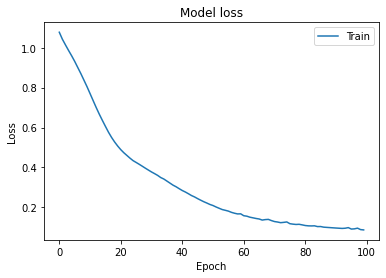

In [19]:
import matplotlib.pyplot as plt

# create plot from loss model
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

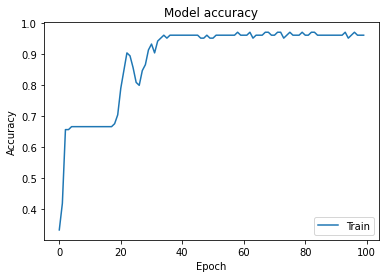

In [20]:
# create plot from accuracy model
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()